# Exploring Relationships

## Import libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#Create inline
%matplotlib inline

In [3]:
#Import data
df = pd.read_csv(r"C:\Users\User\Desktop\STLCITYSC Data Challenge\Data\Cleaned Data.csv", encoding='latin1')

In [4]:
#View columns
df.columns

Index(['Unnamed: 0', 'Game #', 'Month', 'Month #', 'Year', 'Date', 'Home',
       'Home G', 'Visitor', 'Visitor G', 'Total Goals', 'Goal Diff', 'Result',
       'Attendance', 'Attendance %', 'Home Parent', 'Visitor Parent',
       'Stadium', 'Location', 'Find Comma', 'Total Length', 'State Length',
       'City', 'State', 'Year Started', 'Year Ended', 'Capacity', 'Opened',
       'Surface'],
      dtype='object')

In [5]:
#Create subset with variables to explore
sub_df = df[['Attendance', 'Month #', 'Year', 'Total Goals', 'Goal Diff', 'Opened', 'Capacity']]

In [6]:
#View subset
sub_df

,Attendance,Month #,Year,Total Goals,Goal Diff,Opened,Capacity
0,31683,4,1996,1,1,1933,30456
1,26473,4,1996,5,1,1967,16000
2,25266,4,1996,4,4,1922,25243
3,21141,4,1996,3,3,1972,20269
4,69255,4,1996,3,1,1922,26000
...,...,...,...,...,...,...,...
5463,20023,10,2018,1,1,2010,25000
5464,42617,10,2018,3,1,2002,39419
5465,23895,10,2018,5,3,2007,30000
5466,25348,10,2018,3,1,1983,22120


## Explore correlations

In [7]:
#Create correlation matrix
sub_df.corr()

,Attendance,Month #,Year,Total Goals,Goal Diff,Opened,Capacity
Attendance,1.000000,0.042614,0.286202,-0.000998,0.032920,0.078465,0.477319
Month #,0.042614,1.000000,-0.005191,0.033078,0.005892,0.022672,-0.016976
Year,0.286202,-0.005191,1.000000,-0.090332,0.032045,0.525125,-0.023914
Total Goals,-0.000998,0.033078,-0.090332,1.000000,0.128766,-0.088944,0.030599
Goal Diff,0.032920,0.005892,0.032045,0.128766,1.000000,-0.016886,0.046058
Opened,0.078465,0.022672,0.525125,-0.088944,-0.016886,1.000000,-0.195866
Capacity,0.477319,-0.016976,-0.023914,0.030599,0.046058,-0.195866,1.000000


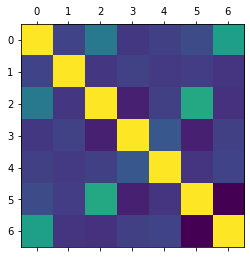

In [8]:
#Create correlation heatmap
plt.matshow(sub_df.corr())
plt.show()

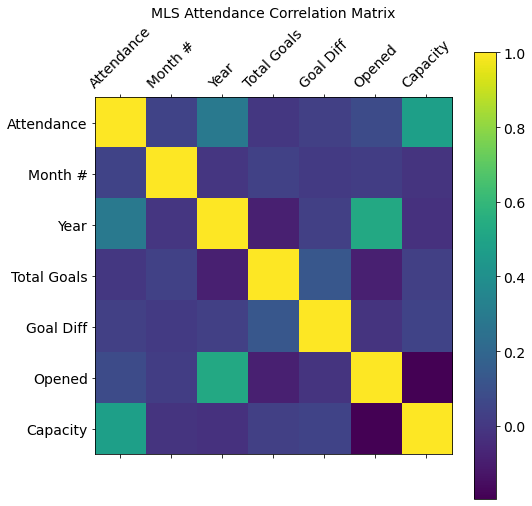

In [9]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) #figure size 
plt.matshow(sub_df.corr(), fignum=f.number) #type of plot
plt.xticks(range(sub_df.shape[1]), sub_df.columns, fontsize=14, rotation=45) #x axis labels
plt.yticks(range(sub_df.shape[1]), sub_df.columns, fontsize=14) #y axis labels
cb = plt.colorbar() #add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) #add font size
plt.title('MLS Attendance Correlation Matrix', fontsize=14) #add title
plt.savefig("MLS Attendance Correlation Matrix.png")

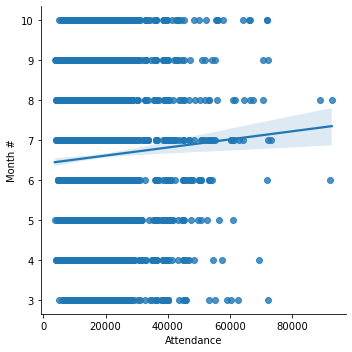

In [10]:
#Create scatterplot for Attendance and Month
sns.lmplot(x = 'Attendance', y = 'Month #', data = sub_df)
plt.savefig("Attendance and Month.png")

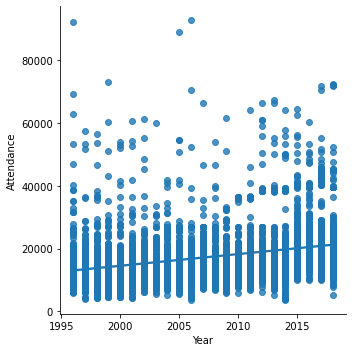

In [11]:
#Create scatterplot for Attendance and Year
sns.lmplot(x = 'Year', y = 'Attendance', data = sub_df)
plt.savefig("Attendance and Year.png")

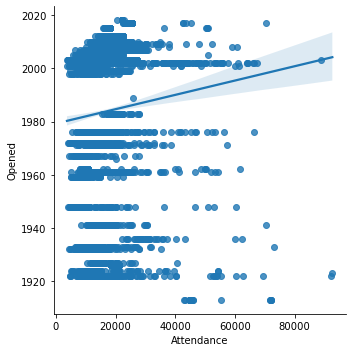

In [12]:
#Create scatterplot for Attendance and Stadium Year Opened
sns.lmplot(x = 'Attendance', y = 'Opened', data = sub_df)
plt.savefig("Attendance and Stadium Year Opened.png")

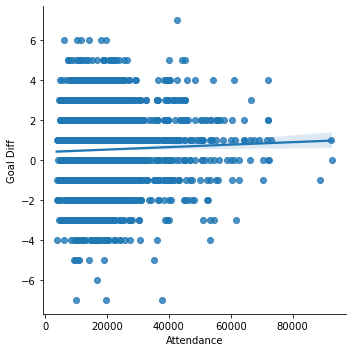

In [13]:
#Create scatterplot for Attendance and Goal Differential
sns.lmplot(x = 'Attendance', y = 'Goal Diff', data = sub_df)
plt.savefig("Attendance and Goal Diff.png")

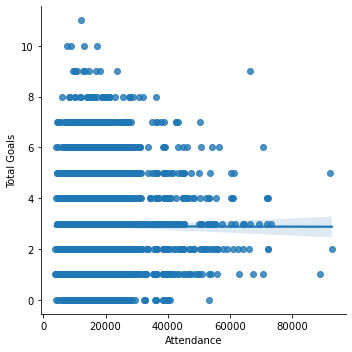

In [14]:
#Create scatterplot for Attendance and Total Goals
sns.lmplot(x = 'Attendance', y = 'Total Goals', data = sub_df)
plt.savefig("Attendance and Total Goals.png")

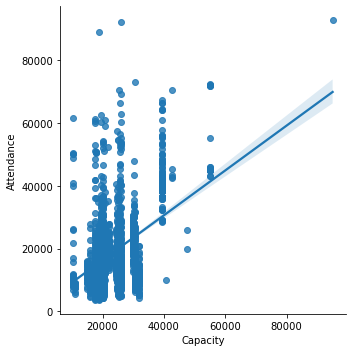

In [15]:
#Create scatterplot for Attendance and Capacity
sns.lmplot(x = 'Capacity', y = 'Attendance', data = sub_df)
plt.savefig("Attendance and Capacity.png")

## k-means clustering analysis

In [16]:
#Elbow technique
num_cl = range(1, 10) #Define range of potential clusters 
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Define k-means clusters in the range assigned above

In [17]:
#Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_df).score(sub_df) for i in range(len(kmeans))] 

score

[-591580640480.3269,
 -309858312604.056,
 -207604184520.35477,
 -170565150072.5369,
 -141025738455.14062,
 -114590957245.39728,
 -98266439509.80789,
 -85925341978.0862,
 -74391553807.33401]

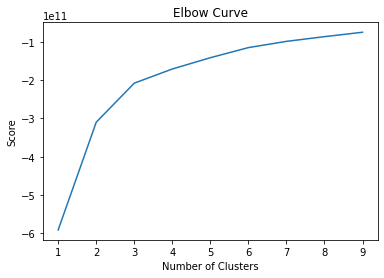

In [18]:
#Plot elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [19]:
#3 clusters -- point where curve "Elbows"

In [20]:
#Create k-means object

kmeans = KMeans(n_clusters = 6) 

In [21]:
#Fit k-means object to data

kmeans.fit(sub_df)

KMeans(n_clusters=6)

In [22]:
sub_df['Clusters'] = kmeans.fit_predict(sub_df)

C:\Users\User\AppData\Local\Temp\ipykernel_6800\792898626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Clusters'] = kmeans.fit_predict(sub_df)


In [23]:
#View cluster column
sub_df.head()

,Attendance,Month #,Year,Total Goals,Goal Diff,Opened,Capacity,Clusters
0,31683,4,1996,1,1,1933,30456,0
1,26473,4,1996,5,1,1967,16000,0
2,25266,4,1996,4,4,1922,25243,0
3,21141,4,1996,3,3,1972,20269,5
4,69255,4,1996,3,1,1922,26000,2


In [24]:
#View cluster count
sub_df['Clusters'].value_counts()

5    2177
1    1495
3     966
0     572
4     181
2      77
Name: Clusters, dtype: int64

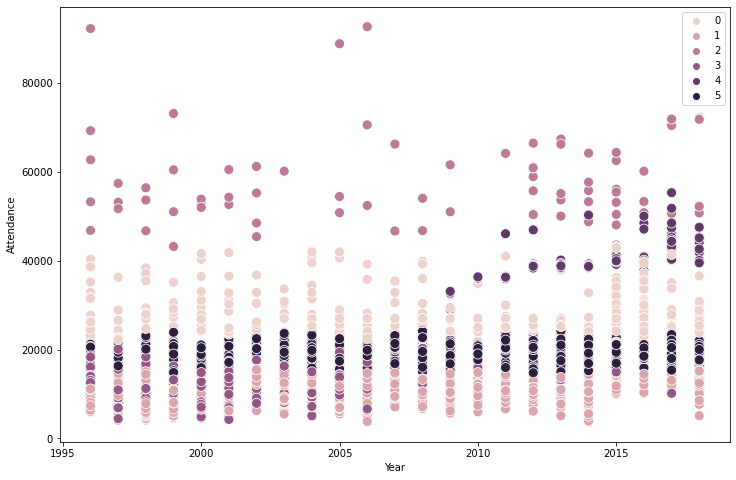

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot clusters for "Year" and "Attendance" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_df['Year'], y=sub_df['Attendance'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Year') #Label x-axis
plt.ylabel('Attendance') #Label y-axis
plt.show()
plt.savefig("Cluster Analysis.png")

In [26]:
#Calculate descriptive statistics
sub_df.groupby('Clusters').agg({'Attendance':['mean', 'median'], 
                         'Total Goals':['mean', 'median'], 
                         'Goal Diff':['mean', 'median'],
                         'Opened':['mean', 'median']})

Attendance          Total Goals        Goal Diff         \
                  mean   median        mean median      mean median   
Clusters                                                              
0         27034.758741  26136.5    3.136364    3.0  0.531469    1.0   
1         11093.732441  11181.0    2.842140    3.0  0.428763    0.0   
2         58545.454545  55234.0    2.987013    3.0  0.467532    1.0   
3         13342.645963  13353.0    3.012422    3.0  0.482402    1.0   
4         39732.088398  39477.0    2.685083    3.0  0.839779    1.0   
5         18936.534221  19004.0    2.823151    3.0  0.555811    1.0   

               Opened          
                 mean  median  
Clusters                       
0         1988.041958  2003.0  
1         1987.653512  1999.0  
2         1968.467532  1976.0  
3         1956.975155  1941.0  
4         1990.828729  2002.0  
5         1992.560864  2005.0

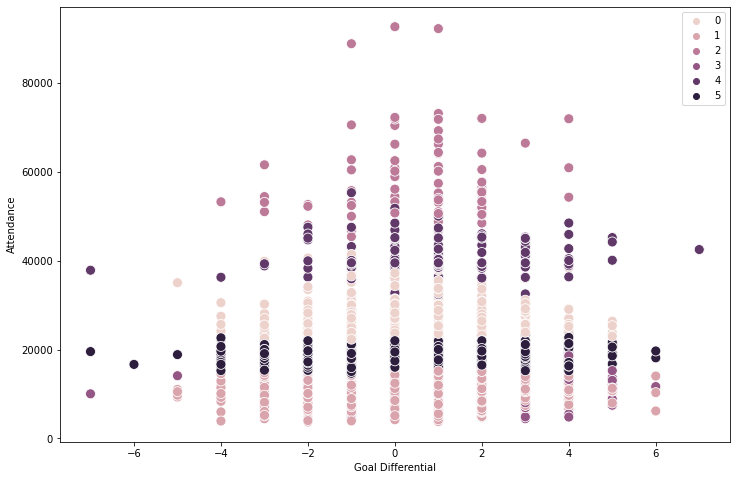

In [27]:
#Plot clusters for "Year" and "Goal Differential" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_df['Goal Diff'], y=sub_df['Attendance'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Goal Differential') #Label x-axis
plt.ylabel('Attendance') #Label y-axis
plt.show()